In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Divide the dataset into Train-test split and do the standard scalling

In [ ]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Import both Dataset

In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)

df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


In [ ]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

In [ ]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


In [ ]:
encoder = LabelEncoder()

In [ ]:
y_train

5931     F4L
20152    F6M
10042    F7L
12013    F0M
5417     F4L
        ... 
779      F0L
9882     F7L
19393    F6M
3943     F2L
21453    F7M
Name: label, Length: 15145, dtype: object

In [ ]:
encoded_y = encoder.fit_transform(y_train)

In [ ]:
encoded_y

array([ 8, 13, 14, ..., 13,  4, 15])

In [ ]:
to_categorical(encoded_y)[0]  # One Hot encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Divide the dataset into Train-test split and do the standard scalling

In [27]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Import both Dataset

In [28]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)

df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


In [29]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

In [30]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


In [32]:
encoder= LabelEncoder()

In [33]:
y_train

20624    F7M
4751     F3L
17228    F4M
8216     F6L
5009     F3L
        ... 
9951     F7L
4604     F3L
21305    F7M
5062     F3L
8086     F6L
Name: label, Length: 15145, dtype: object

In [34]:
encoded_y = encoder.fit_transform(y_train)
encoded_y

array([15,  6,  9, ..., 15,  6, 12])

In [35]:
to_categorical(encoded_y)[0]  # One Hot encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

# One Hot Encoding the Fault Classes

In [37]:
encoder= LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
dummy_y = to_categorical(encoded_y)

encoded_y_test = encoder.transform(y_test)
dummy_y_test = to_categorical(encoded_y_test)

In [38]:
encoder.classes_


array(['F0L', 'F0M', 'F1L', 'F1M', 'F2L', 'F2M', 'F3L', 'F3M', 'F4L',
       'F4M', 'F5L', 'F5M', 'F6L', 'F6M', 'F7L', 'F7M'], dtype=object)

# Building ANN Model

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

In [40]:
n_inputs = X_sc_train.shape[1]
output_cls = len(encoder.classes_)

# define input
visible = Input(shape=(n_inputs,))

# define Hidden
e = Dense(50,activation='relu')(visible)
e = Dense(100,activation='relu')(e)

# define output
output = Dense(output_cls, activation='softmax')(e)

model = Model(inputs= visible, outputs=output)

# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',    # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 16)                1616      
                                                                 
Total params: 7,416
Trainable params: 7,416
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=40, verbose=1)

# fit the autoencoder model to reconstruct input
history = model.fit(X_sc_train,   ## Training Feature
                    dummy_y,      ## Training Labels
                    epochs=500,
                    batch_size=500,
                    verbose=2,
                    validation_data=(X_sc_test,dummy_y_test),
                    callbacks = early_stop,
                    shuffle=True)

#After training, we can plot the learning curves for the train and test sets to confirm the model learned the reconstruction problem well.
model.save(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/Trained_models/ANN.h5')

Epoch 1/500
31/31 - 2s - loss: 2.5575 - accuracy: 0.2355 - val_loss: 2.2981 - val_accuracy: 0.4275 - 2s/epoch - 66ms/step
Epoch 2/500
31/31 - 0s - loss: 2.0582 - accuracy: 0.5094 - val_loss: 1.7752 - val_accuracy: 0.5805 - 371ms/epoch - 12ms/step
Epoch 3/500
31/31 - 0s - loss: 1.5140 - accuracy: 0.6460 - val_loss: 1.2480 - val_accuracy: 0.7175 - 397ms/epoch - 13ms/step
Epoch 4/500
31/31 - 0s - loss: 1.0815 - accuracy: 0.7152 - val_loss: 0.9157 - val_accuracy: 0.7355 - 315ms/epoch - 10ms/step
Epoch 5/500
31/31 - 0s - loss: 0.8268 - accuracy: 0.7585 - val_loss: 0.7266 - val_accuracy: 0.7786 - 355ms/epoch - 11ms/step
Epoch 6/500
31/31 - 0s - loss: 0.6773 - accuracy: 0.7927 - val_loss: 0.6150 - val_accuracy: 0.8131 - 239ms/epoch - 8ms/step
Epoch 7/500
31/31 - 0s - loss: 0.5832 - accuracy: 0.8175 - val_loss: 0.5371 - val_accuracy: 0.8244 - 185ms/epoch - 6ms/step
Epoch 8/500
31/31 - 0s - loss: 0.5192 - accuracy: 0.8294 - val_loss: 0.4824 - val_accuracy: 0.8461 - 161ms/epoch - 5ms/step
Epoch 

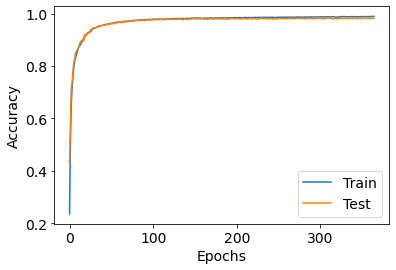

In [45]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using the Trained Model For Validation

In [46]:
model.predict(X_sc_test)[0].argmax()

203/203 [==============================] - 1s 2ms/step


2

In [50]:
encoder.inverse_transform([12])

array(['F6L'], dtype=object)